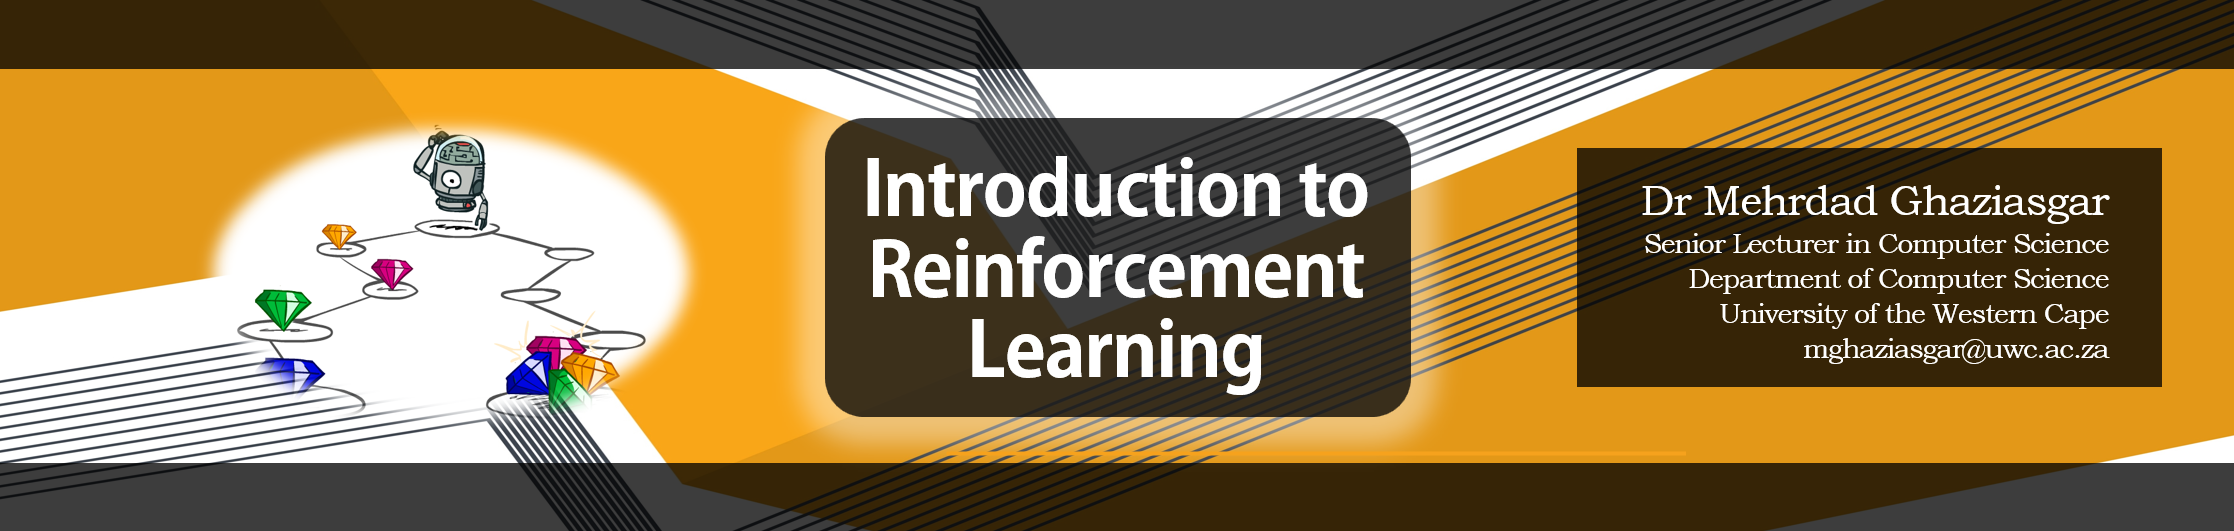

# Practical Exercise 1 - Markov Decision Processes [60 marks]

In this exercise, you'll be putting into practice all of the knowledge obtained in the first part of the course to do with MDPs. I'll be giving you the basic structure of a generic MDP. The MDP can be customized to virtually any kind of problem by specifying its parameters i.e. states, transition and rewards functions.

Your job will ultimately be to familiarize yourself with the MDP structure to be able to implement an actual MDP for a given problem. More importantly, you'll have to implement value iteration, policy iteration and policy extraction. Bon apetit!

### Student Number

Please type in your student number below by setting the value of the student number variable. Don't change anything; just put in your student number

In [273]:
STUDENTNUMBER = "1234567"  #SET THIS!

Ok let's get into it. Below is the abstract MDP class.

In [274]:
import numpy as np
import random

'''An abstract MDP; don't change anything in this abstract class'''
class MDP:

    def __init__(self, discount=1):
        self.states = []
        self.discount = discount

        # The states need to be obtained; either explicitly define them in getSpecifyStates
        # or getComputeStates will try to infer them from the transitions
        if hasattr(self,'getSpecifyStates'):
            self.states = self.getSpecifyStates()
        else:
            self.states = self.getComputeStates()

    # Return the start state.
    def getStartState(self): raise NotImplementedError("Override me")

    # Return true or false depending on whether state is a terminal state
    def getTerminalStates(self): raise NotImplementedError("Override me")

    # Return set of actions possible from |state|.
    def getActions(self, state): raise NotImplementedError("Override me")

    # Return a list of (newState, prob, reward) tuples corresponding to edges
    # coming out of |state|.
    # Mapping to notation from class:
    #   state = s, action = a, newState = s', prob = T(s, a, s'), reward = Reward(s, a, s')
    # If IsEnd(state), return the empty list.
    
    def getTransitionAndReward(self, state, action): raise NotImplementedError("Override me")
    
    # **Credit: stanford.edu**
    # Compute set of states reachable from startState.  Helper function for
    # MDPAlgorithms to know which states to compute values and policies for
    # This function returns a list of all reachable states
    
    def getComputeStates(self):
        # print(self.getStartState())
        
        states = set()
        queue = []
        states.add(self.getStartState())
        queue.append(self.getStartState())
        
        while len(queue) > 0:
            state = queue.pop()
            for action in self.getActions(state):
                for newState, prob, reward in self.getTransitionAndReward(state, action):
                    if newState not in states:
                        states.add(newState)
                        queue.append(newState)
        return states

The generic MDP above can be used to implement virtually any specific MDP. To do this, one creates a class that inherits from the MDP class above and overrides/defines key methods that specify the MDP.

Specifically, the child class MUST define the following methods:

- `getStartState()`: This method should return a single value that represents the start state (whatever it may be). Obviously, my MDP implementation assumes that an MDP has a single start state. This is Ok for now.
<br><br>
- `getTerminalStates()`: This method should return a list containing all possible terminal states.
<br><br>
- `getActions(state)` This method takes in a state and should return a list containing all valid actions from that state. It is crucial to ensure that the actions returned are valid from that state.
<br><br>
- `getTransitionAndReward(state, action)` This method generally represents the transition function $T(s,a,s')$ **and** the reward function $R(s,a,s')$. If you think back to the Bellman Equation, you might notice that $T$ and $R$ are used in the same equation and context i.e. to calculate $Q$ values. Therefore, I think it makes sense to have a single function that returns both for a given state and action. Anyway, this function takes in a state and an action and should return a list containing one or more triplets $(s',T(s,a,s'),R(s,a,s'))$ for all $s'$ that are reachable from $s$ under action $a$.

The functions above **MUST** be defined. 

The child class **MAY** define the following, as necessary, and depending on the specific problem:

- `__init__`: This is the optional constructor; it will be defined if the MDP has some custom parameters that need to be created/defined e.g. the living reward in MazeWorld. **VERY IMPORTANT:** the base MDP class above does have a constructor already which has some crucial functionality, so if a new constructor is defined in the child class, it is crucial to call the parent class' constructor using `super().__init__(discount=discount)` inside the new constructor.
<br><br>
- `getSpecifyStates()`: This method, if defined, should return a list of all the possible states. If it's defined, the base MDP class' constructor calls it to set the class `self.states` attribute. If it isn't defined, the base MDP class' constructor calls the `self.getComputeStates()` method which automatically uses the existing methods in the class (i.e. `getStartState`, `getTerminalStates`, `getActions` and `getTransitionAndReward` to automatically infer the states and set `self.states`.

In the cell below, I've provided you with three example implementations of MDPs: one for the cars MDP in lectures, one for the Card Game in Exercise 1 of the MDP Exercise Worksheet, and one for the maze world from the lectures. The goal here is to allow you to see how it's done. You need to then use this knowledge to create an MDP of your own (later on). Mostly focus on the cars MDP and the card game MDP; the maze world MDP is much more complex and is provided just for info.

---

## Example: CarsMDP

First up is the CarsMDP for the MDP discussed in lectures. NOTE that this is NOT the "correct" way to implement it; this is not at all the only way to do this; this is just **one** way of doing this. I've tried to keep the implementation as simple as possible for the sake of understandability. Here's a description:

Here it is.

In [275]:
class CarsMDP(MDP):

    def getStartState(self):
        return "Cool"

    def getTerminalState(self):
        return ["Overheated"]

    #You don't need this! But here it is for reference sake
#     def getSpecifyStates(self):
#         return ["Cool" ,"Warm" ,"Overheated"]
    def getActions(self, state):
        if state in self.getTerminalState():
            return []
        else:
            return ["Fast" ,"Slow"]
            
    def getTransitionAndReward(self, state, action):

        if state == "Cool":

            if action == "Slow":

                return [("Cool" ,1.0 ,1)]

            else:
                #Here's one way of doing it
                #Create an empty list and append all the options to it
                result = []
                result.append(("Warm" ,0.5 ,2))
                result.append(("Cool" ,0.5 ,2))
                return result

        elif state == "Warm":

            if action == "Slow":
                
                #Here's another way: if there are very few options, you can just return a single list with all the options
                return [("Warm" ,0.5 ,1),("Cool" ,0.5 ,1)]

            else:

                return [("Overheated" ,1.0 ,-10)]
                

Before instantiating the CarsMDP, below is a helper function that takes in an MDP object and enumerates all the possible states, and associated transitions and rewards in those states and returns them in printable format (so we can see if it is correctly defined). Look through it to see what it's doing. Advisable NOT to modify it, unless you insist...

In [276]:
#DON'T CHANGE!
def getMDPAllTransitionandRewards(mdp):
    out = []
    for st in mdp.states:
        out.append(f"State {st} options:")
        for act in mdp.getActions(st):
            out.append(f"Action '{act}': {mdp.getTransitionAndReward(st,act)}")
        out.append("")
    return "\n".join(out)

Below, we'll instantiate this MDP and use the previously defined helper function to display all transitions and rewards, to check if it looks correct.

In [277]:
carsmdp = CarsMDP()
print(getMDPAllTransitionandRewards(carsmdp))

State Overheated options:

State Warm options:
Action 'Fast': [('Overheated', 1.0, -10)]
Action 'Slow': [('Warm', 0.5, 1), ('Cool', 0.5, 1)]

State Cool options:
Action 'Fast': [('Warm', 0.5, 2), ('Cool', 0.5, 2)]
Action 'Slow': [('Cool', 1.0, 1)]



---

## Example: CardGameMDP

Below is the MDP for the Card Game in Exercise 1 in the MDP Exercise Worksheet.

In [278]:
class CardGameMDP(MDP):

    def getStartState(self):
        return 0

    def getActions(self, state):
        if state in self.getTerminalStates():
            return []
        elif state == self.getStartState():
            return ['draw']
        else:
            return ['stop','draw']

    def getTerminalStates(self):
        return ['END']

    # The below function is unnecessary, but will work if defined
#     def getSpecifyStates(self):
#         result = list(range(6))
#         result.remove(1)
#         result.append('END')
#         return result

    def getTransitionAndReward(self, state, action):

        if action == 'stop':
            return [('END', 1.0, state)]
        
        elif action == 'draw':
            result = []
            
            if state == 0:
                result = [(2,1/3,0),(3,1/3,0),(4,1/3,0)]
            
            elif state == 2:
                result = [(4,1/3,0),(5,1/3,0),('END',1/3,0)]
                
            elif state == 3:
                result = [(5,1/3,0),('END',2/3,0)]
                
            elif state in [4,5]:
                result = [('END',1.0,0)]
                
            return result
        
#             #Here's another way of doing the same thing
#             result = []
            
#             if state == 0:
#                 result.append((2,1/3,0))
#                 result.append((3,1/3,0))
#                 result.append((4,1/3,0))
            
#             elif state == 2:
#                 result.append((4,1/3,0))
#                 result.append((5,1/3,0))
#                 result.append(('END',1/3,0))
                
#             elif state == 3:
#                 result.append((5,1/3,0))
#                 result.append(('END',2/3,0))
                
#             elif state in [4,5]:
#                 result.append(('END',1.0,0))
                
#             return result
            
#             #Here's a much smarter way to do the same thing:
#             result = []
#             for draw in range(2,5): #2,3 or 4
#                 if state + draw <= 5:
#                     result.append((state+draw, 1./3., 0))
#                 else:
#                     result.append(('END',1/3,0))

#             return result


Below, we'll instantiate this MDP and use the previously defined helper function to display all transitions and rewards, to check if it looks correct.

In [279]:
cardgamemdp = CardGameMDP()
print(cardgamemdp.states)
print(getMDPAllTransitionandRewards(cardgamemdp))

{0, 2, 3, 4, 'END', 5}
State 0 options:
Action 'draw': [(2, 0.3333333333333333, 0), (3, 0.3333333333333333, 0), (4, 0.3333333333333333, 0)]

State 2 options:
Action 'stop': [('END', 1.0, 2)]
Action 'draw': [(4, 0.3333333333333333, 0), (5, 0.3333333333333333, 0), ('END', 0.3333333333333333, 0)]

State 3 options:
Action 'stop': [('END', 1.0, 3)]
Action 'draw': [(5, 0.3333333333333333, 0), ('END', 0.6666666666666666, 0)]

State 4 options:
Action 'stop': [('END', 1.0, 4)]
Action 'draw': [('END', 1.0, 0)]

State END options:

State 5 options:
Action 'stop': [('END', 1.0, 5)]
Action 'draw': [('END', 1.0, 0)]



---

## Example: MazeWorldMDP

Finally, I'm providing you with MazeWorldMDP. This is just for information purposes. The MDPs you'll need to create below will not be nearly this complex. NOTE that this is NOT the "correct" way to implement the MazeWorld; this is not at all the only way to do this; this is just **my** way of doing this. Here's a description:

- My MazeWorldMDP takes in a numpy array which is presumably a map of the maze;
- Entries with `None` are taken to be blocked cells;
- Non-zero values in the maze are taken to be a value that is received by the agent **AFTER** it has arrived on that block **AND** then takes an action on that block i.e. the agent does not receive that reward when it arrives on the block.
- The way I decided to define it, this MDP has pre-terminal states i.e. states that lead to a final TERMINAL_STATE state that has no actions and leads nowhere. The pre-terminal states are the same as the +1 and -1 blocks in the Maze World in the lectures. I did this way because the MazeWorld in the lectures does it this way, and I wanted the values to end up being exactly the same. More than welcome to play around with it and make the +1 and -1 cells terminal states (although you'd have to think this through very carefully).
- States are blocks in the maze which is a numpy array; therefore, states are defined by a set of coordinates (row,col) which index into the numpy array.
- Actions N,E,S and W can therefore be defined as (-1,0), (0,1), (1,0) and (0,-1) respectively, because adding these to a given state will lead to the corresponding block e.g. going north from (2,0) means going to state (1,0) and this can be achieved by adding the two vectors [2,0] and [-1,0].

Enough describing; take a look at my implementation.


In [280]:
'''
MazeWorldMDP
Author: M Ghaziasgar
'''

class MazeWorldMDP(MDP):
    def __init__(self, maze, discount=1.0, livingreward=0.0):
        self.maze = maze
        self.livingreward = livingreward
        super().__init__(discount=discount)

    def getStartState(self):
        #Bottom-left
        return (2, 0)

    def getTerminalStates(self):
        return ["TERMINAL_STATE"]


    def getPreTerminalStates(self):
        indices = np.argwhere(np.logical_or(self.maze == 1, self.maze == -1))
        index_tuples = [tuple(index) for index in indices]
        return index_tuples
    
    def getActions(self, state):
        if state in self.getTerminalStates():
            return []
        elif state in self.getPreTerminalStates():
            return ["EXIT"]
        else:
            # n,s,e,w
            return [(-1,0), (0,1), (1,0), (0,-1)]

    def getSpecifyStates(self):
        indices = np.argwhere(self.maze != None)
        index_tuples = [tuple(index) for index in indices]
        states = index_tuples
        states.append("TERMINAL_STATE")
        return states

    def getTransitionAndReward(self, state, action):
        # Return a list of (newState, prob, reward) tuples corresponding to edges

        if state in self.getPreTerminalStates():
            return [("TERMINAL_STATE", 1.0, self.maze[state])]
        elif state in self.getTerminalStates():
            return [(state, 1.0, 0)]

        result = []

        for direction, prob in [(action, 0.8), ((action[1], action[0]), 0.1), ((-action[1], -action[0]), 0.1)]:
            state_prime = tuple(np.add(state, direction))
            if state_prime in self.states:
                result.append([state_prime, prob, self.livingreward + self.maze[state]])
            else:
                result.append([state, prob, self.livingreward])

        return result

Ok, here's some code to instantiate the MazeWorldMDP and enumerate the transitions and rewards.

In [281]:
maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mwmdp = MazeWorldMDP(maze=maze,discount=0.9,livingreward=0.0)

print(getMDPAllTransitionandRewards(mwmdp))

State (0, 0) options:
Action '(-1, 0)': [[(0, 0), 0.8, 0.0], [(0, 0), 0.1, 0.0], [(0, 1), 0.1, 0.0]]
Action '(0, 1)': [[(0, 1), 0.8, 0.0], [(1, 0), 0.1, 0.0], [(0, 0), 0.1, 0.0]]
Action '(1, 0)': [[(1, 0), 0.8, 0.0], [(0, 1), 0.1, 0.0], [(0, 0), 0.1, 0.0]]
Action '(0, -1)': [[(0, 0), 0.8, 0.0], [(0, 0), 0.1, 0.0], [(1, 0), 0.1, 0.0]]

State (0, 1) options:
Action '(-1, 0)': [[(0, 1), 0.8, 0.0], [(0, 0), 0.1, 0.0], [(0, 2), 0.1, 0.0]]
Action '(0, 1)': [[(0, 2), 0.8, 0.0], [(0, 1), 0.1, 0.0], [(0, 1), 0.1, 0.0]]
Action '(1, 0)': [[(0, 1), 0.8, 0.0], [(0, 2), 0.1, 0.0], [(0, 0), 0.1, 0.0]]
Action '(0, -1)': [[(0, 0), 0.8, 0.0], [(0, 1), 0.1, 0.0], [(0, 1), 0.1, 0.0]]

State (0, 2) options:
Action '(-1, 0)': [[(0, 2), 0.8, 0.0], [(0, 1), 0.1, 0.0], [(0, 3), 0.1, 0.0]]
Action '(0, 1)': [[(0, 3), 0.8, 0.0], [(1, 2), 0.1, 0.0], [(0, 2), 0.1, 0.0]]
Action '(1, 0)': [[(1, 2), 0.8, 0.0], [(0, 3), 0.1, 0.0], [(0, 1), 0.1, 0.0]]
Action '(0, -1)': [[(0, 1), 0.8, 0.0], [(0, 2), 0.1, 0.0], [(1, 2), 0

---

## Exercise 1A: Creating an MDP for the Walkway or Subway Problem [10 marks]

Following on my examples above, your task in this question is to design your own MDP for the "Walkway or Subway" problem in Exercise 5 in the MDP Exercise Worksheet. Here's the problem statement again, and note that I':

You’re trying to get to work. Home is at state 1 and work is at state N=10. In between home and work are states [2,9]. Naturally, you’re trying to get from state 1 to 10. At each state, you have the option to walk or to take the subway. If you walk, you will get to the next sequential state with a probability of 1.0, and it will take you 1 minute e.g. if at state 3, you’ll get to state 4 with a probability of 1.0 and lose 1 minute. You also have the option of taking the subway but this is rife with complexities: taking the subway will take you 2 minutes (because it is presumably more time consuming to go underground and get to the station); taking the subway has a 0.4 probability of failing (e.g. the train isn’t available) and so you’ll stay in the same state; BUT it also has a 0.6 probability of doubling your state e.g. if you’re currently at state 4, you’ll jump to state 8. Note that an action can only be taken if it results in a valid state e.g. you can’t take the subway at state 6 and beyond (because you’ll be ending up at non-existent states).

Note that you can safely assume that there are exactly 10 states; no more, no less.

Below, I've put in a skeleton for your MDP for you to fill out and complete.

**IMPORTANT NOTE**: In the MDP below, I haven't defined the optional `getSpecifyStates` function; you CAN define and use it if you wish, but if you do a good job on the other functions, you won't need it. I leave it up to you.

Below we'll instantiate your MDP and display a list of all transitions and rewards. Look through it carefully to make sure it makes sense and is true to this MDP problem. Note that, if you did it correctly, the output of the `getMDPAllTransitionandRewards` function should be exactly like the below:

<blockquote>
State 1 options:<br>
Action 'walk': [(2, 1.0, -1.0)]<br>
Action 'subway': [(2, 0.6, -2.0), (1, 0.4, -2.0)]<br>
<br>
State 2 options:<br>
Action 'walk': [(3, 1.0, -1.0)]<br>
Action 'subway': [(4, 0.6, -2.0), (2, 0.4, -2.0)]<br>
<br>
State 3 options:<br>
Action 'walk': [(4, 1.0, -1.0)]<br>
Action 'subway': [(6, 0.6, -2.0), (3, 0.4, -2.0)]<br>
<br>
State 4 options:<br>
Action 'walk': [(5, 1.0, -1.0)]<br>
Action 'subway': [(8, 0.6, -2.0), (4, 0.4, -2.0)]<br>
<br>
State 5 options:<br>
Action 'walk': [(6, 1.0, -1.0)]<br>
Action 'subway': [(10, 0.6, -2.0), (5, 0.4, -2.0)]<br>
<br>
State 6 options:<br>
Action 'walk': [(7, 1.0, -1.0)]<br>
<br>
State 7 options:<br>
Action 'walk': [(8, 1.0, -1.0)]<br>
<br>
State 8 options:<br>
Action 'walk': [(9, 1.0, -1.0)]<br>
<br>
State 9 options:<br>
Action 'walk': [(10, 1.0, -1.0)]<br>
<br>
State 10 options:
    </blockquote>

In [359]:
class TransportMDP(MDP):
    
    
    def getStartState(self):
        # '''YOUR CODE IN HERE: This must return a single state - NOT a list '''
        return 1
    
    def getTerminalStates(self):
# '''YOUR CODE IN HERE: This must return a list of terminal states; if there's only one terminal state, return a list with one state in it'''
        return ['10']

    def getActions(self, state):
        if state == self.getTerminalStates() :
#             print(state)
            return []
        elif state == self.getStartState():
            return ['walk']
        else :
            return ["subway"]
        
        if state in [1,2,3,4,5]:
#             print(state)
            return ["walk","subway"]
        elif state in [6,7,8,9] :
#             print(state)
            return "walk"
        
# '''YOUR CODE IN HERE: This must return a list containing all the action(s) plausible starting from `state`. If there's
#             only one plausible action, return a list with the one and only action in it. If no actions are plausible, return
#             an empty list.        
#         '''
    def getTransitionAndReward(self,state,action):
        
        result = []
        if action=="walk" :
            for state in [1,2,3,5,6,7,8,9] :
                return [(state+1,1,-1)]
#             return [(state+1,1,-1)]
        elif action=="subway" : 
            for state in [1,2,3,4,5] :
#                 print(state)
                return [(2*state,0.6,-2),(state,0.4,-2)]
#             return [(2*state,0.6,-2),(state,0.4,-2)]
                
#     def getComputeStates(self) :
#         print(self.getStartState())
#         states = set()
#         queue = []
#         states.add(self.getStartState())
#         queue.append(self.getStartState())
#         while len(queue) > 0:
#             state = queue.pop()
#             for action in self.getActions(state):
#                 for newState, prob, reward in self.getTransitionAndReward(state, action):
#                     if newState not in states:
#                         states.add(newState)
#                         queue.append(newState)
#         return states
    
#  '''YOUR CODE IN HERE: This must return a list containing one or more triplets (s_prime, prob, reward) 
# representing each of the successor states reachable from `state` under `action`, as well as the probability
# of reaching the successor state and the reward obtained for successfully making that transition.Note that, if you did a good job on getActions, you don't need to worry about checking fringe cases in this function
# Moving forward, we'll ensure that we only call this function using states and actions that are plausible (by querying
# getActions)  
# '''
# state+=1 #walk
# state=2*state #sub win

In [360]:
transportmdp=TransportMDP() 
print(getMDPAllTransitionandRewards(transportmdp))  

State 1 options:
Action 'walk': [(2, 1, -1)]

State 2 options:
Action 'subway': [(2, 0.6, -2), (1, 0.4, -2)]



---

The cell below will run a battery of tests to give you an indication of whether your class appears to be setup correctly. You get marks for each test that passes, up to a total of **[10 marks]** (if all tests pass).

**A Note on the Auto-Marker**: The auto-marker instantiates the MDP and calls specific functions (depending on the test) to display information. It then does a string comparison of the output with the output of a pre-built version which you will need to match. Note that if there are differences, such differences will be highlighted in the output of the test; the output produced by calling up your function(s) will be indicated with a "-" in front, and the output of the auto-marker's pre-built solution will be indicated with a "+" in front. Use the "-" and "+" lines to determine what in your code (if anything) needs to be fixed/changed.

As a concrete example, if you run the cell below without making any improvements to the TransportMDP I gave you above, one of the tests that will fail is the `Check Terminal State(s)` test, and some part of the output will be:

```-['Set Correctly']```<br>
```+[10]```

This means that the code above, as it currently is, is producing a terminal state list of `['Set Correctly']` whereas the auto-marker is expecting it to be `[10]`.

In [320]:
import utils

transportmdp = TransportMDP()
params = utils.params1(transportmdp)
utils.testCell(params)


1
1
2
2
4


TypeError: 'NoneType' object is not iterable

---

## Exercise 1B: Creating an MDP for the Bungee Jumper Problem [10 marks]

Following on my examples above, your task in this question is to design another MDP, and this one will be based on the "Bungee Jumper" problem in Exercise 4 in the MDP Exercise Worksheet, but it will be different in some ways (see below). Here's the problem statement:

Examine the MDP in the diagram below. It characterizes a bungee jumping loop in a gridded world. The states are shown in the diagram, and consist of the grid blocks. In this example, for simplicity, I've decided to give the states numbers in the range `[1-14]`; the start state is `1` and states `2` to `14` follow clockwise (I've shown a few but not all of the states in the diagram for clarity). There is no terminal state in this MDP. The central feature of interest is a set of two squares with thick vertical lines representing stairs, followed by two bungee jumping squares, representing by curvy lines.

The agent is free to move between squares (back and forth), except on the two bungee jumping squares and the square immediately after it (for safety reasons), in which states the agent is only allowed to take the action indicated in the diagram i.e. bungee-ing down or moving out of the way as shown in the diagram. Keep in mind that moving forward from state `14` will move the agent to state `1` and moving backward from state `1` will move the agent to state `14`.

The actions are clearly indicated by arrows in the diagram; to simplify things, let’s assume that the default motion is clockwise; therefore there are two actions: forward i.e. one movement in clockwise direction; and backward i.e. one movement in anti-clockwise direction.

**On all (except one) of the states, actions are deterministic, meaning that actions taken have a guaranteed success probability of 1.0. The only exception to this is state `5`** as follows. In state `5`, the agent has two action options:

1. Backward, which will deterministically (i.e. probability 1.0) take the agent down the stairs back to state `4` with a reward of 0; 
2. Forward, in which case the agent has a 60% chance of actually taking the jump (i.e. ending up in state `6`), but there’s a 40% chance that the agent might chicken-out and go back one step and end up in state `4` and this causes chicken-sadness with a reward of -1.

Notably, the agent is not allowed to stay in one place; it must make a move during each time step, in accordance with the rules previously described.

Rewards associated with this MDP are also depicted in the diagram. The agent experiences a sense of nice and good joy and satisfactionism when bungee-ing, earning a reward of +2 when moving onto states `6` and `7`. On the other hand, there's a level of discomfort associated with climbing the steps, resulting in a reward of -1 each transition. In all other instances (other than the ones described above), the agent receives rewards of 0 regardless of the direction of movement. Hopefully you can see that the time horizon for this MDP is infinite, meaning that it can continue indefinitely without a set endpoint.

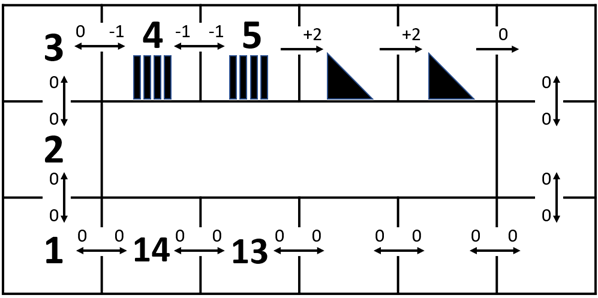


Below, I've put in a skeleton for your MDP for you to fill out and complete.

**IMPORTANT NOTE**: In the MDP below, I again haven't defined the optional `getSpecifyStates` function; you CAN define and use it if you wish, but if you do a good job on the other functions, you won't need it. I leave it up to you.

In [ ]:
class BungeeMDP(MDP):
    
    def getStartState(self):
        '''YOUR CODE IN HERE: This must return a single state - NOT a list'''
        return 0
    
    def getTerminalStates(self):
        '''YOUR CODE IN HERE: This must return a list of terminal states; if there's only one terminal state, return a list with one state in it'''
        return ["Set Correctly"]
    
    def getActions(self, state):
        '''YOUR CODE IN HERE: This must return a list containing all the action(s) plausible starting from `state`. If there's
            only one plausible action, return a list with the one and only action in it. If no actions are plausible, return
            an empty list.        
        '''
        return ["Set Correctly"]
    
    def getTransitionAndReward(self,state,action):
        '''YOUR CODE IN HERE: This must return a list containing one or more triplets (s_prime, prob, reward) 
            representing each of the successor states reachable from `state` under `action`, as well as the probability
            of reaching the successor state and the reward obtained for successfully making that transition.
            
            Note that, if you did a good job on getActions, you don't need to worry about checking fringe cases in this function
            Moving forward, we'll ensure that we only call this function using states and actions that are plausible (by querying
            getActions).
            '''
        return []

Below we'll instantiate your MDP and display a list of all transitions and rewards. Look through it carefully to make sure it makes sense and is true to this MDP problem. Note that, if you did it correctly, the output of the `getMDPAllTransitionandRewards` function should be exactly like the below:

<blockquote>
State 1 options:<br>
Action '-1': [(14, 1.0, 0)]<br>
Action '1': [(2, 1.0, 0)]<br>
<br>
State 2 options:<br>
Action '-1': [(1, 1.0, 0)]<br>
Action '1': [(3, 1.0, 0)]<br>
<br>
State 3 options:<br>
Action '-1': [(2, 1.0, 0)]<br>
Action '1': [(4, 1.0, -1)]<br>
<br>
State 4 options:<br>
Action '-1': [(3, 1.0, 0)]<br>
Action '1': [(5, 1.0, -1)]<br>
<br>
State 5 options:<br>
Action '-1': [(4, 1.0, 0)]<br>
Action '1': [(6, 0.6, 2), (4, 0.4, -1)]<br>
<br>
State 6 options:<br>
Action '1': [(7, 1.0, 2)]<br>
<br>
State 7 options:<br>
Action '1': [(8, 1.0, 0)]<br>
<br>
State 8 options:<br>
Action '1': [(9, 1.0, 0)]<br>
<br>
State 9 options:<br>
Action '-1': [(8, 1.0, 0)]<br>
Action '1': [(10, 1.0, 0)]<br>
<br>
State 10 options:<br>
Action '-1': [(9, 1.0, 0)]<br>
Action '1': [(11, 1.0, 0)]<br>
<br>
State 11 options:<br>
Action '-1': [(10, 1.0, 0)]<br>
Action '1': [(12, 1.0, 0)]<br>
<br>
State 12 options:<br>
Action '-1': [(11, 1.0, 0)]<br>
Action '1': [(13, 1.0, 0)]<br>
<br>
State 13 options:<br>
Action '-1': [(12, 1.0, 0)]<br>
Action '1': [(14, 1.0, 0)]<br>
<br>
State 14 options:<br>
Action '-1': [(13, 1.0, 0)]<br>
Action '1': [(1, 1.0, 0)]<br>
    </blockquote>

In [ ]:
bungeemdp = BungeeMDP()
print(getMDPAllTransitionandRewards(bungeemdp))

---

The cell below will run a battery of tests to give you an indication of whether your class appears to be setup correctly. You get marks for each test that passes, up to a total of **[10 marks]** (if all tests pass).

In [ ]:
import utils

params = utils.params2(bungeemdp)
utils.testCell(params)


---
## Exercise 2: Implementing MDP Solving Algorithms

Ok now the real fun begins. We're going to implement the amazing algorithms we've talked about in class.

Below, I've created a skeleton MDPSolver class for you. I've clearly indicated parts where your code should go; ONLY change the parts in the class between the clearly indicated landmarks:

```#START CODING HERE#```

```#STOP CODING HERE#```

So I've decided to give you the functions for the following so DON'T CHANGE THEM:

- Policy Extraction
- Policy Iteration


You're welcome. Look through these functions (especially the Policy Extraction function) very carefully and use them as examples to help you implement the following functions (parts of) which you are required to implement:
- Q function
- Value Iteration
- Policy Evaluation

In each case, I've provided some guidelines and instructions in the function skeletons below, and COpious comments... Yes, COpious; emphasis on CO.

Note that the Policy Extraction function won't work without a working getQ function (which you will have to implement), and the Policy Iteration function won't work without several other functions. We'll get them working as we go.

In [ ]:
#DON'T CHANGE THESE FUNCTIONS; just look through them (especially getPolicyExtraction) to get an idea of how to do it
def getPolicyExtraction(mdp, V):
    """
    Extract the policy pi corresponding to a given value function for a given MDP

    Args:
        mdp (MDP): The Markov Decision Process MDP object.
        V (dict): The value function mapping states to their values.

    Returns:
        dict: The optimal policy pi mapping states to actions.

    This function extracts the policy pi corresponding to the given value function by selecting the action with
    the highest Q-value for each state (according to the Bellman equation).

    - `mdp`: The MDP object representing the environment and transitions.
    - `V`: The value function mapping states to their values.

    Returns the optimal policy as a dictionary mapping states to selected actions.
    """
    pi = {}

    # Loop through all states in the Markov Decision Process.
    for state in mdp.states:
        # If the state is a terminal state, set the policy to "None" and continue (to the next state).
        if state in mdp.getTerminalStates():
            pi[state] = "None"
            continue

        # Initialize variables to keep track of the action with the highest Q-value.
        maxAction = ""
        maxQ = -np.inf #Since we're maximizing, initially set this to the smallest possible value i.e -infinity

        # Loop through all possible actions in the current state.
        for action in mdp.getActions(state):
            # Calculate the Q-value for the current state-action pair.
            Q = getQ(mdp, state, action, V)

            # If the current state's Q-value is higher than the currently tracked maximum Q value, update the action and maximum Q value to this one.
            if Q > maxQ:
                maxQ = Q
                maxAction = action

        # Ok we're done searching through actions for this state;
        # Set the policy for the current state to the action with the highest Q-value found.
        pi[state] = maxAction

    # Return the extracted optimal policy as a dictionary mapping states to selected actions.
    return pi


def getPolicyIteration(mdp, kiters=100, kitersv=10, pi_start=None, checkconverge=True, epsilonconverge=1e-10, randseed=786):
    """
    Perform policy iteration to find the optimal policy for a given Markov Decision Process (MDP).

    Args:
        mdp (MDP): The Markov Decision Process MDP object.
        kiters (int): The maximum number of policy iteration steps (default: 100).
        kitersv (int): The maximum number of iterations in policy evaluation (default: 10).
        pi_start (dict): Initial policy mapping states to actions (default: None). If None, a random policy will be computed and used.
        checkconverge (bool): Whether to check for convergence (default: True).
        epsilonconverge (float): Convergence threshold (default: 1e-10).
        randseed (int): Seed for random action selection (default: 786).

    Returns:
        tuple: A tuple containing the optimal policy and the value function.

    This function performs policy iteration to find the optimal policy for a given MDP. It iteratively
    updates the policy and value function until convergence or the specified number of iterations.

    - `mdp`: The MDP object representing the environment and transitions.
    - `kiters`: The maximum number of policy iteration steps.
    - `kitersv`: The maximum number of iterations in policy evaluation.
    - `pi_start`: Initial policy mapping states to actions.
    - `checkconverge`: Whether to check for convergence using `epsilonconverge`.
    - `epsilonconverge`: The convergence threshold for checking changes in the policy.
    - `randseed`: Seed for random action selection when initializing the policy.

    Returns a tuple containing the optimal policy and the value function.
    """
    if not pi_start:
        # Initialize a random policy if no initial policy is provided.
        # Not using np.random.choice - it doesn't like actions that are tuples as in MazeWorld - random.choice doesn't care
        random.seed(randseed)
        pi = {state: random.choice(mdp.getActions(state)) if mdp.getActions(state) else 0.0 for state in mdp.states}
    else:
        # Otherwise just use the initial policy provided
        pi = pi_start

    # Initialize the value function to all zeroes.
    vpi = {state:0. for state in mdp.states}

    for k in range(kiters):

        # Perform policy evaluation for the current policy in order to get the state values.
        vpi = getPolicyEvaluation(mdp, pi, kitersv, vpi, checkconverge, epsilonconverge)

        # Extract a new policy based on the updated value function.
        pinew = getPolicyExtraction(mdp, vpi)

        #If the newly obtained pi is the same as the one in the previous iteration, we've converged (hopefully)
        if pinew == pi:
#             print(f"Converged; bailing out at iteration {k + 1}")
            break
        
        # Update the policy to the newly obtained policy (either so it can be used
        # as the starting point for the next iteration, or so we can just return
        # it if we're done iterating)
        pi = pinew.copy()

    # Return both the policy pi and corresponding values
    return pi, vpi

---
## Exercise 2A - Implementing the $Q$ function [5 marks]

Ok now below go ahead and fill in code for `getQ` using the instruction provided in the function. Note that I've tried to provide you with step-by-step instructions, but if you're Python-savvy, you CAN actually do the Q value computation in one line of code. Not saying you should, but you can if you're capable.

In [ ]:
def getQ(mdp, state, action, V):

    """
    Calculate the Q-value for a given state-action pair using the Bellman equation.

    Args:
        mdp (MDP): The Markov Decision Process MDP object.
        state: The current state.
        action: The action taken in the current state.
        V (dict): The value function mapping states to their values.

    Returns:
        float: The Q-value for the state-action pair.

    This function calculates the Q-value for a given state-action pair using the Bellman equation.

    - `mdp`: The MDP object representing the environment and transitions.
    - `state`: The current state for which to calculate the Q-value.
    - `action`: The action taken in the current state.
    - `V`: The value function mapping states to their values.

    Returns the Q-value for the state-action pair.
    """
    
    #START CODING HERE#

    #1. Get the list of triplets (state_prime, prob, reward) for this state using the mdp.getTransitionAndReward function
    #2. Then, for each triplet in the list, 
    #      Calculate the expected utility value for this triplet using the Bellman equation i.e prob x (reward + mdp.discount x V[state_prime])
    #3. Set the value of variable q below to the sum of all triplet utilities

    q = 0 #Ultimately set this correctly
    
    #STOP CODING HERE#
    
    return q 


---
The cell below will try some inputs on your Q function and see it works correctly. I'll use the MDPs I created and which were provided to you. If you're doing it correct, you should the following output when running the cell below:

<blockquote>
Card game output:<br>
<br>
Value function is: {0: 3.333333333333333, 2: 3.0, 3: 3.0, 4: 4.0, 5: 5.0, 'END': 0.0}<br>
Q(0,draw): 3.33<br>
Q(2,stop): 2.0<br>
Q(2,draw): 3.0<br>
Q(3,stop): 3.0<br>
Q(3,draw): 1.67<br>
Q(4,stop): 4.0<br>
Q(4,draw): 0.0<br>
Q(5,stop): 5.0<br>
Q(5,draw): 0.0<br>
<br>
Value function is: {0: 0.0, 2: 2.0, 3: 2.0, 4: 4.0, 5: 2.0, 'END': 0.0}<br>
Q(0,draw): 2.67<br>
Q(2,stop): 2.0<br>
Q(2,draw): 2.0<br>
Q(3,stop): 3.0<br>
Q(3,draw): 0.67<br>
Q(4,stop): 4.0<br>
Q(4,draw): 0.0<br>
Q(5,stop): 5.0<br>
Q(5,draw): 0.0<br>
<br>
<br>
Maze world output:<br>
<br>
Q((0, 0),'North'): 0.33<br>
Q((0, 1),'North'): 0.37<br>
Q((0, 2),'North'): 0.43<br>
Q((0, 3),'North'): 1.0<br>
Q((1, 0),'North'): 0.31<br>
Q((1, 2),'North'): 0.32<br>
Q((1, 3),'North'): -1.0<br>
Q((2, 0),'North'): 0.27<br>
Q((2, 1),'North'): 0.22<br>
Q((2, 2),'North'): 0.26<br>
Q((2, 3),'North'): -0.36<br>
Q(TERMINAL_STATE,'North'): 0.0
</blockquote>

In [ ]:
#Try it on the card game mdp
print("Card game output:\n")
cardgamemdp = CardGameMDP()
Vtry = [{0: 3.333333333333333, 2: 3.0, 3: 3.0, 4: 4.0, 5: 5.0, 'END': 0.0},
        {0: 0.0, 2: 2.0, 3: 2.0, 4: 4.0, 5: 2.0, 'END': 0.0},
       ]

for Vopt in Vtry:
    print(f"Value function is: {Vopt}")
#     print("Q values: ",{(state,action):getQ(cardgamemdp,state,action,Vopt) for state in cardgamemdp.states for action in cardgamemdp.getActions(state)})
#     print()
    for state in cardgamemdp.states:
        for action in cardgamemdp.getActions(state):
            print(f"Q({state},{action}): {round(getQ(cardgamemdp,state,action,Vopt),2)}")
    print()

            
#Also try it on the maze world mdp; we're only going to use it on action norths

print("\nMaze world output:\n")
maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.5,livingreward=0.0)

Vtry = [{(0, 0): 0.6449692376237589,
 (0, 1): 0.7443801465395761,
 (0, 2): 0.8477662780034063,
 (0, 3): 1.0,
 (1, 0): 0.5663144525471923,
 (1, 2): 0.5718590331455521,
 (1, 3): -1.0,
 (2, 0): 0.4906839635684729,
 (2, 1): 0.4308444557875266,
 (2, 2): 0.4754711304247786,
 (2, 3): 0.2772958394329731,
 'TERMINAL_STATE': 0.0} 
       ]

for Vopt in Vtry:
    for state in mazeworldmdp.states:
        print(f"Q({state},'North'): {round(getQ(mazeworldmdp,state,(-1,0),Vopt),2)}")

---

The cell below will run a battery of tests to give you an indication of whether your code appears to be working correctly. You get marks for each test that passes, up to a total of **[5 marks]** (if all tests pass).

In [ ]:
import utils
cardgamemdp = CardGameMDP(discount=0.9)




maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.5,livingreward=0.0)

params = utils.params3(cardgamemdp,mazeworldmdp,getQ)
utils.testCell(params)


---
OK, now that your `getQ` function is hopefully working, we **can** actually run the `getPolicyExtraction` function I gave you earlier. Just for interest-sake, let's run it below for both card game and maze world using some pre-computed values $V$ and extract a policy from those values:

In [ ]:
#Helper function to display Maze World policy as a nice visually pleasing matrix
def formatMazePolicy(mazemdp,pi,rounding=True,roundnum=3):
    
    actionlist = {(-1, 0):"^", (1, 0):"v", (0, 1):">", (0, -1):"<", "EXIT":'Q'}
    
    newmaze = np.empty_like(mazemdp.maze)

    for state in mazemdp.states:
        if state in mazemdp.getTerminalStates():
            continue
        newmaze[state]=actionlist[pi[state]]
        
    return newmaze

cardgamemdp = CardGameMDP(discount=0.9)
Vopt = {0: 2.91, 2: 2.7, 3: 3.0, 4: 4.0, 5: 5.0, 'END': 0.0}

print("Card game policy extracted:")
print(getPolicyExtraction(cardgamemdp,Vopt))


maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.9,livingreward=-0.3)
Vopt = {(0, 0): -0.371683078947941, (0, 1): 0.03342674459103333, (0, 2): 0.4547360146731282, (0, 3): 1.0, (1, 0): -0.6922095327408787, (1, 2): -0.06878029608280317, (1, 3): -1.0, (2, 0): -0.9565611157916984, (2, 1): -0.8008861308555889, (2, 2): -0.4954536489859903, (2, 3): -0.8205787113114174, 'TERMINAL_STATE': 0.0}

print("\nMaze world policy extracted:")
pi = getPolicyExtraction(mazeworldmdp,Vopt)
print(formatMazePolicy(mazeworldmdp,pi=pi,rounding=True,roundnum=3))


Hopefully you can see that the policies obtained are exactly the ones shown in lectures and/or in the Exercise sheet.

---
## Exercise 2B - Implementing the Value Iteration Algorithm [15 marks]

Ok, now below fill in code to do Value Iteration. Use the Policy Extraction function given to you (`getPolicyExtraction`) as a good example of how it can be done. Use the `mdp` functions `mdp.getTerminalStates`, `mdp.getActions(state)` along with the newly written `getQ` function to make this easier (actually possible). 

In [ ]:
def getValueIteration(mdp, kiters=100, V_start=None, checkconverge=True, epsilonconverge=1e-10):
    """
    Perform value iteration to find the optimal value function for a given Markov Decision Process (MDP).

    Args:
        mdp (MDP): The Markov Decision Process MDP object.
        kiters (int): The maximum number of iterations (default: 100).
        V_start (dict): Initial value function (default: None, initializes to zeros).
        checkconverge (bool): Whether to check for convergence (default: True).
        epsilonconverge (float): Convergence threshold (default: 1e-10).

    Returns:
        dict: The optimal value function for the MDP.

    This function performs value iteration to find the optimal value function for a given MDP.
    It iteratively updates the value function until convergence or the specified number of iterations.

    - `mdp`: The MDP object representing the environment and transitions.
    - `kiters`: The maximum number of iterations.
    - `V_start`: The initial value function (if None, initializes to zeros).
    - `checkconverge`: Whether to check for convergence using `epsilonconverge`.
    - `epsilonconverge`: The convergence threshold for checking changes in the value function.

    Returns the optimal value function.
    """
    
    #If a V_start has NOT been provided to start with, just make one with all zeros i.e. start at V0
    #Otherwise just use the one provided (V_start)
    if not V_start:
        V_new = {state: 0. for state in mdp.states}
    else:
        V_new = V_start

    #Iterate kiters times
    for k in range(kiters):

        #Make a copy of V_new (usually from the previous iteration) which is now going to be
        #the V_prev in this iteration; V_new will be used to store all new V values while
        #V_prev will be used to compute all Q values in this iteration
        V_prev = V_new.copy()

        #START CODING HERE#

        #Here's the pseudo-code for you:
        #For each state in mdp's states
        #   Check if the state is in the list of mdp's terminal states (getTerminalStates()) and if so, continue the loop i.e. ignore it (So that it's value remains 0)
        #   For each action in the list of actions of this state (getActions(state))
        #        Compute the Q value of this state using the getQ function with this action and using V_prev as a lookup
        #        If this Q value is the highest seen so far (out of all the actions looped over)
        #            Set V_new[state] to this Q value

    
        #STOP CODING HERE#
            
        #Check for convergence i.e. if the abs(difference between previous and new V values) for all states is less than epsilonconverge
        if checkconverge and max([abs(v1-v2) for v1,v2 in zip(V_new.values(),V_prev.values())]) <= epsilonconverge:
            return V_new

    return V_new


---
The cell below will apply the value iteration function `getValueIteration` to actual MDPs. I'll again use the MDPs I created and which were provided to you i.e. the card game and maze world. If you're doing it correct, you should the following output when running the cell below:

<blockquote>
Card game value function after 100 iterations OR convergence (whichever comes first):<br>
0: 3.333<br>
2: 3.0<br>
3: 3.0<br>
4: 4.0<br>
5: 5.0<br>
END: 0.0<br>
<br>
Maze world value function after 100 iterations OR convergence (whichever comes first):<br>
[[0.64 0.74 0.85 1.0]<br>
 [0.57 None 0.57 -1.0]<br>
 [0.49 0.43 0.48 0.28]]<br>
</blockquote>

Hopefully you've noticed (and are delighted) that the values here are the same as those obtained in the Exercises / Lectures.

In [ ]:
#Helper function to display state values neatly
def formatValueFunction(V,rounding=True,roundnum=3):
    return "\n".join([f"{state}: {val}" if not rounding else f"{state}: {round(val,roundnum)}" for state,val in V.items()])

#Helper function to display maze values in the maze itself
def formatMazeValueFunction(mazemdp,v,rounding=True,roundnum=3):
            
    newmazev = np.empty_like(mazemdp.maze)

    for state in mazemdp.states:
        if state in mazemdp.getTerminalStates():
            continue
        newmazev[state]=v[state] if not rounding else round(v[state],roundnum) 

    return newmazev


#Try it on the card game mdp
print("Card game value function after 100 iterations OR convergence (whichever comes first):")
cardgamemdp = CardGameMDP()
print(formatValueFunction(getValueIteration(cardgamemdp)))



#Also try it on the maze world mdp; we're only going to use it on action norths
print("\nMaze world value function after 100 iterations OR convergence (whichever comes first):")
maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.9,livingreward=0.0)
print(formatMazeValueFunction(mazeworldmdp,getValueIteration(mazeworldmdp),roundnum=2))

---

The cell below will run a battery of tests to give you an indication of whether your code appears to be working correctly. You get marks for each test that passes, up to a total of **[15 marks]** (if all tests pass).

In [ ]:
import utils
cardgamemdp = CardGameMDP(discount=0.8)

maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.5,livingreward=-0.1)

params = utils.params4(cardgamemdp,mazeworldmdp,getValueIteration)
utils.testCell(params)


---
## Exercise 2C - Implementing Policy Evaluation [10 marks]

It's all downhill from here. The good news is that policy evaluation is almost exactly the same as value iteration, except that you actually don't need to compute the $Q$ value for every action for every state. Rather, you only compute the $Q$ value of the action that is **given to you** in the policy $\pi$. Policy evaluation is therefore like a "lite" version of value iteration which doesn't have a loop that loops through actions; instead it just uses `pi[state]` as the default action in any state. More importantly, there is also no need to compare $Q$ values in each state or to compare them... Rather, you just compute the one and only $Q$ value of the action that is **given to you** in the policy $\pi$ and use that as the value of the state.

Fill in code to do Policy Evaluation below. It may be a good idea to actually copy YOUR code of the Value Iteration function above and use it as a starting point; you will need to make a few modifications (mostly removals) and it should be done. 

In [ ]:
def getPolicyEvaluation(mdp, pi, kiters=100, V_start=None, checkconverge=True, epsilonconverge=1e-10):
    """
    Perform policy evaluation for a Markov Decision Process (MDP) using the given policy.

    Args:
        mdp (MDP): The MDP object.
        pi (dict): The policy mapping states to actions; to be evaluated.
        kiters (int): The (max) number of iterations to perform (default: 100).
        V_start (dict): Initial value function (default: None, initializes to zeros). If provided, it is used as the initial value function. If not, it starts at V0 i.e. all zeros.
        checkconverge (bool): Whether to check for convergence (default: True).
        epsilonconverge (float): Convergence threshold (default: 1e-10).

    Returns:
        dict: The estimated value function for the given policy.

    This function performs policy evaluation to estimate the value function for a given policy in an MDP.
    It iteratively updates the value function until convergence or the specified number of iterations.

    - `mdp`: The MDP object representing the environment and transitions.
    - `pi`: The policy dict mapping states to actions.
    - `kiters`: The maximum number of iterations to perform.
    - `V_start`: The initial value function (if None, initializes to zeros).
    - `checkconverge`: Whether to check for convergence using `epsilonconverge`.
    - `epsilonconverge`: The convergence threshold for checking changes in the value function.

    Returns the estimated value function.
    """
    
    #If a V_start has NOT been provided to start with, just make one with all zeros i.e. start at V0
    #Otherwise just use the one provided (V_start)
    if not V_start:
        V_new = {state: 0. for state in mdp.states}
    else:
        V_new = V_start

    #Iterate kiters times
    for k in range(kiters):

        #Make a copy of V_new (usually from the previous iteration) which is now going to be
        #the V_prev in this iteration; V_new will be used to store all new V values while
        #V_prev will be used to compute all Q values in this iteration
        V_prev = V_new.copy()
        
        #START CODING HERE#

        #Here's the pseudo-code for you:
        #For each state in mdp's states
        #   Check if the state is in the list of mdp's terminal states (getTerminalStates()) and if so, continue the loop i.e. ignore it (So that it's value remains 0)
        #   Go right ahead and compute the Q value of this state using the getQ function with the action defined in pi for this state (pi[state]), and using V_prev as a lookup
        #   Set V_new[state] to this Q value
        #   (That's it; it's like a lite version of value iteration)
        
        #STOP CODING HERE#

        #Check for convergence i.e. if the abs(difference between previous and new V values) for all states is less than epsilonconverge
        if checkconverge and max([abs(v1-v2) for v1,v2 in zip(V_new.values(),V_prev.values())]) <= epsilonconverge:
            return V_new

    return V_new

---
The cell below will apply the policy evaluation function `getPolicyEvaluation` to actual MDPs as before. If you're doing it correct, you should the following output when running the cell below:

<blockquote>
Evaluating a random policy for card game:<br>
Policy is:  {0: 'draw', 2: 'stop', 3: 'draw', 4: 'stop', 5: 'stop', 'END': 0.0}<br>
Policy value function:  {0: 2.5555555555555554, 2: 2.0, 3: 1.6666666666666665, 4: 4.0, 5: 5.0, 'END': 0.0}<br>
<br>
Evaluating a random policy for maze world:<br>
Policy is: <br>
[['v' '^' 'v' 'Q']<br>
 ['>' None '^' 'Q']<br>
 ['v' '^' '>' '>']]<br>
Policy value function:<br>
[[-0.022 0.007 0.045 1.0]<br>
 [-0.029 None -0.063 -1.0]<br>
 [-0.068 -0.144 -0.381 -0.474]]<br>
</blockquote>

In [ ]:
#Try it on the card game mdp
print("Evaluating a random policy for card game:")
cardgamemdp = CardGameMDP()

cardgamepi = {0: 'draw', 2: 'stop', 3: 'draw', 4: 'stop', 5: 'stop', 'END': 0.0}
print("Policy is: ", cardgamepi)
print("Policy value function: ", getPolicyEvaluation(cardgamemdp,cardgamepi))

maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

print()

print("Evaluating a random policy for maze world:")

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.9,livingreward=0.0)

mazeworldpi = {(0, 0): (1, 0), (0, 1): (-1, 0), (0, 2): (1, 0), (0, 3): 'EXIT', (1, 0): (0, 1), (1, 2): (-1, 0), (1, 3): 'EXIT', (2, 0): (1, 0), (2, 1): (-1, 0), (2, 2): (0, 1), (2, 3): (0, 1), 'TERMINAL_STATE': 0.0}
print("Policy is: ")
print(formatMazePolicy(mazeworldmdp,mazeworldpi))
print("Policy value function:")
vmaze = getPolicyEvaluation(mazeworldmdp,mazeworldpi)
print(formatMazeValueFunction(mazeworldmdp,vmaze))

---

The cell below will run a battery of tests to give you an indication of whether your code appears to be working correctly. You get marks for each test that passes, up to a total of **[10 marks]** (if all tests pass).

In [ ]:
import utils

cardgamemdp = CardGameMDP()
maze = np.array([[0, 0, 0, +1],
              [0, None, 0, -1],
              [0, 0, 0, 0]])

mazeworldmdp = MazeWorldMDP(maze=maze,discount=0.9,livingreward=0.0)

params = utils.params5(cardgamemdp,mazeworldmdp,getPolicyEvaluation)
utils.testCell(params)



---
## Exercise 2D - Trying the MDP Solver Functions on Your Own MDPs [10 marks]

And finally, we'll just run the MDP solver funtions on the two MDPs you wrote. The cell below runs the different functions on your MDPs. The cell that follows runs value iteration on your MDPs and checks if they work; if value iteration works correctly, you get 5 marks (for each MDP).

In [ ]:
transportmdp = TransportMDP()
bungeemdp = BungeeMDP()


for mdp,name in [[transportmdp,"Transport MDP"],[bungeemdp,"Bungee MDP"]]: 
    print("_"*30)
    print(f"{name}:")
    print("_"*30)
    print("Carrying out Value Iteration...")
    Vopt = getValueIteration(mdp)
    print("Optimal value function:")
    print(Vopt)
    print()
    print("Extracting the policy:")
    piopt = getPolicyExtraction(mdp,Vopt)
    print(piopt)

    print()
    print("Trying policy iteration...")
    piopt2,Vopt2 = getPolicyIteration(mdp)
    print("The optimal policy (using policy iteration) is (should be the same as the previous one):")
    print(piopt2)


    print("_"*30 + "\n")



---

The cell below will run a battery of tests to give you an indication of whether the value iteration and poicy iteration algorithms run on your MDPs without issue. You get marks for each test that passes, up to a total of **[10 marks]** (if all tests pass).

In [ ]:
import utils

transportmdp = TransportMDP(discount=0.9)
bungeemdp = BungeeMDP(discount=0.9)

params = utils.params6(transportmdp,bungeemdp,getValueIteration, getPolicyIteration)
utils.testCell(params)


In [ ]:
#This code just present a way of creating an MDP

---
---